<a href="https://colab.research.google.com/github/MINED30/EATA/blob/main/Segformer_%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Street View Panorama From Google

In [1]:
!git clone https://github.com/cplusx/google-street-view-panorama-download

fatal: destination path 'google-street-view-panorama-download' already exists and is not an empty directory.


In [2]:
%cd google-street-view-panorama-download/

/content/google-street-view-panorama-download


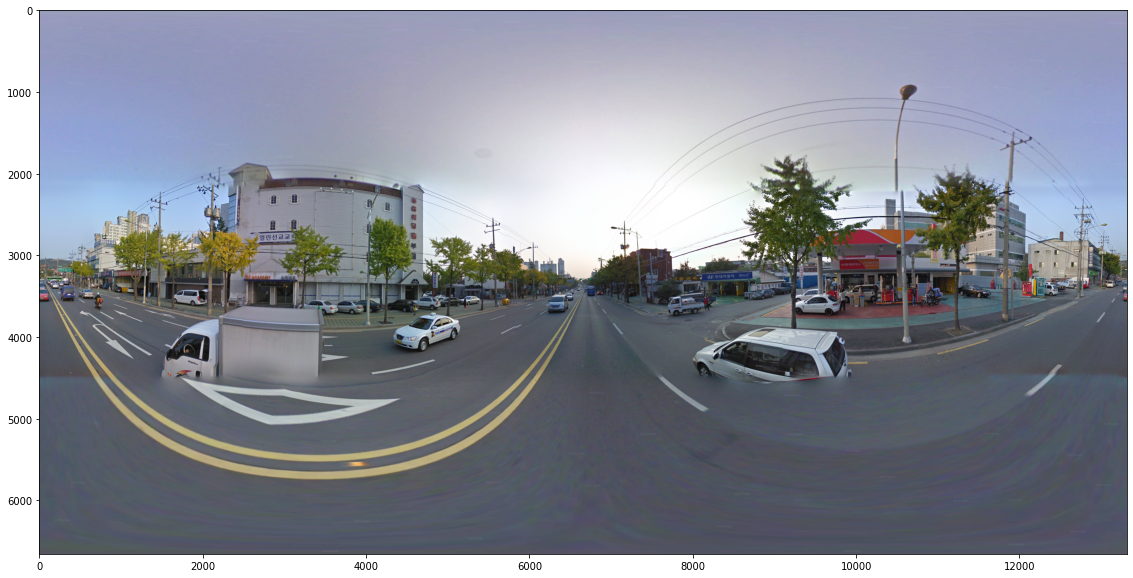

In [44]:
import streetview
import matplotlib.pyplot as plt

panoids = streetview.panoids(lat=37.57676083, lon=127.0567272)
panoid = panoids[0]['panoid']
panorama = streetview.download_panorama_v3(panoid, zoom=5, disp=False)
plt.figure(figsize=(30,10))
plt.imshow(panorama)
plt.show()

In [56]:
from PIL import Image
im = Image.fromarray(panorama)
im = im.resize((1024,1024))
im.save("your_file.jpeg")

In [57]:
im = Image.open(r"/content/google-street-view-panorama-download/your_file.jpeg")

# SegFormer HuggingFace

In [5]:
!pip install transformers

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


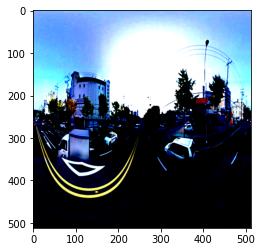

In [61]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
from skimage.transform import resize
import requests
pretrained_ = "nvidia/segformer-b1-finetuned-cityscapes-1024-1024"
feature_extractor = SegformerFeatureExtractor.from_pretrained(pretrained_)
model = SegformerForSemanticSegmentation.from_pretrained(pretrained_)

# inputs = feature_extractor(images=panorama, return_tensors="pt")
inputs = feature_extractor(images=im, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits # shape (batch_size, num_labels, height/4, width/4)
plt.imshow(inputs['pixel_values'][0].permute(1,2,0))



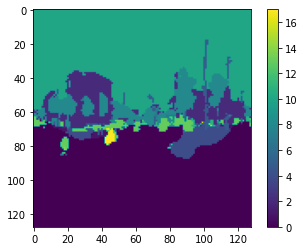

In [62]:
plt.imshow(outputs.logits.argmax(dim=1).view(128,128),cmap='viridis')
plt.colorbar()

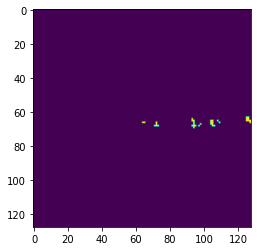

In [63]:
x = np.array(outputs.logits.argmax(dim=1)==11).reshape(128,128)
plt.imshow(x)

In [64]:
model.config.id2label

{0: 'road',
 1: 'sidewalk',
 2: 'building',
 3: 'wall',
 4: 'fence',
 5: 'pole',
 6: 'traffic light',
 7: 'traffic sign',
 8: 'vegetation',
 9: 'terrain',
 10: 'sky',
 11: 'person',
 12: 'rider',
 13: 'car',
 14: 'truck',
 15: 'bus',
 16: 'train',
 17: 'motorcycle',
 18: 'bicycle'}

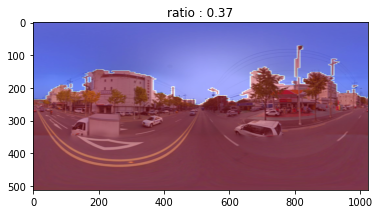

In [65]:
import matplotlib.pyplot as plt
import numpy as np
mask_ = np.array((logits.argmax(dim=1)[0,:,:]==10).int())
mask = resize(mask_, (512, 1024))
back_ = np.array(((inputs['pixel_values'][0].permute(1,2,0)+1.9638)/4.6038))
back = resize(back_,(512,1024))
plt.figure()
plt.title(f"ratio : {round(mask_.mean(),2)}")
plt.imshow(back)
plt.imshow(mask,cmap='bwr_r',interpolation='nearest', alpha=0.3)
plt.show()